/tmp/ipykernel_1348710/903397887.py:31: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


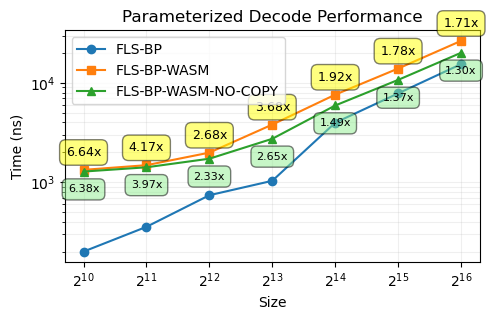

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

sizes = [1024, 2048, 4096, 8192, 16384, 32768, 65536]
fls_bp_times = [201.03, 356.71, 741.98, 1036.1, 3978.9, 7847.6, 15466.0]
fls_bp_wasm_times = [1335.2, 1487.7, 1990.0, 3812.0, 7623.8, 13962.0, 26507.0]
fls_bp_wasm_no_copy_times = [1283.5, 1416.8, 1729.1, 2742.5, 5931.0, 10732.0, 20110.0]

def plot(sizes, fls_bp_times, fls_bp_wasm_times, fls_bp_wasm_no_copy_times):
    plt.figure(figsize=(5, 3.3))
    plt.plot(sizes, fls_bp_times, marker='o', label='FLS-BP')
    if fls_bp_wasm_times is not None:
        plt.plot(sizes, fls_bp_wasm_times, marker='s', label='FLS-BP-WASM')
        # Calculate ratios
        ratios = [wasm / bp for wasm, bp in zip(fls_bp_wasm_times, fls_bp_times)]
        # Add ratio text to each FLS-BP-WASM point
        for i, (size, time, ratio) in enumerate(zip(sizes, fls_bp_wasm_times, ratios)):
            plt.annotate(f'{ratio:.2f}x', 
                        (size, time),
                        textcoords="offset points",
                        xytext=(0,10),
                        ha='center',
                        fontsize=9,
                        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                        )
    plt.plot(sizes, fls_bp_wasm_no_copy_times, marker='^', label='FLS-BP-WASM-NO-COPY')

    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.ylim(bottom=0)
    ratios_wasm_no_copy = [wasm_no_copy / bp for wasm_no_copy, bp in zip(fls_bp_wasm_no_copy_times, fls_bp_times)]
    # Add ratio text to each FLS-BP-WASM-NO-COPY point
    for i, (size, time, ratio) in enumerate(zip(sizes, fls_bp_wasm_no_copy_times, ratios_wasm_no_copy)):
        plt.annotate(f'{ratio:.2f}x', 
                    (size, time),
                    textcoords="offset points",
                    xytext=(0,-15),
                    ha='center',
                    fontsize=8,
                    bbox=dict(boxstyle='round,pad=0.5', fc='lightgreen', alpha=0.5),
                    )


    plt.xlabel('Size')
    plt.ylabel('Time (ns)')
    plt.title('Parameterized Decode Performance')
    plt.legend()
    plt.grid(True, which="both", ls="-", alpha=0.2)

    plt.tight_layout()
    plt.show()
plot(sizes, fls_bp_times, fls_bp_wasm_times, fls_bp_wasm_no_copy_times)

In [8]:
import json
import csv

def parse_jsonl_to_csv(name):
    # Input and output file paths
    input_file_path = f"{name}.jsonl"  # Replace with your input file path
    output_file_path = f"{name}.csv"  # Replace with your desired output file path

    # Open the input file in read mode
    with open(input_file_path, 'r') as infile:
        # Open the output file in write mode
        with open(output_file_path, 'w', newline='') as outfile:
            # Create a CSV writer
            csv_writer = csv.writer(outfile)
            
            # Write the header row to the CSV file
            csv_writer.writerow(["Type", "Size", "Time"])
            
            # Iterate through each line in the input file
            for line in infile:
                # Parse the JSON object from the line
                data = json.loads(line.strip())
                if data['reason'] == 'group-complete':
                    continue
                # Extract the \id\ field
                id_parts = data["id"].split('/')
                if 'noop' in id_parts[1]:
                    continue
                # Determine the type (native or wasm)
                type_ = "wasm" if "wasm" in id_parts[1] else "native"
                
                # Extract the size and the typical estimate time
                size = id_parts[-1]
                time = data["typical"]["estimate"]
                
                # Write the row to the CSV file
                csv_writer.writerow([type_, size, time])

    print("CSV file created successfully.")

CSV file created successfully.


/tmp/ipykernel_1327983/1829146588.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


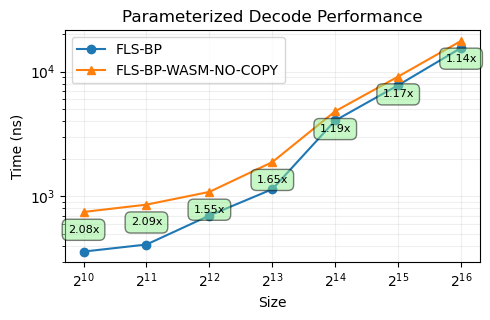

In [14]:

name = "output_release"
parse_jsonl_to_csv(name)
# Read the CSV file
csv_file_path = f"{name}.csv"  # Replace with your output file path
data = pd.read_csv(csv_file_path)
data['Size'] = pd.to_numeric(data['Size'])

# Separate data into wasm and native
wasm_data = data[data['Type'] == 'wasm']
native_data = data[data['Type'] == 'native']

# Sort data by 'Size'
wasm_data = wasm_data.sort_values('Size')
native_data = native_data.sort_values('Size')

plot(wasm_data['Size'], native_data['Time'], None, wasm_data['Time'])

CSV file created successfully.


/tmp/ipykernel_1327983/1829146588.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


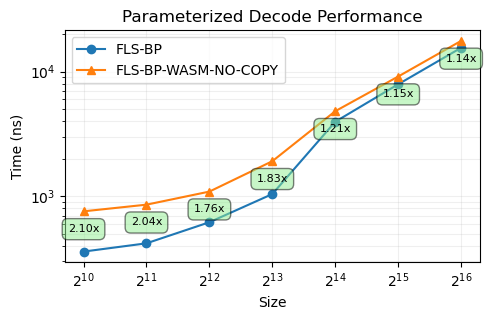

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
name = "output_debuginfo"
parse_jsonl_to_csv(name)
# Read the CSV file
csv_file_path = f"{name}.csv"  # Replace with your output file path
data = pd.read_csv(csv_file_path)
data['Size'] = pd.to_numeric(data['Size'])

# Separate data into wasm and native
wasm_data = data[data['Type'] == 'wasm']
native_data = data[data['Type'] == 'native']

# Sort data by 'Size'
wasm_data = wasm_data.sort_values('Size')
native_data = native_data.sort_values('Size')

plot(wasm_data['Size'], native_data['Time'], None, wasm_data['Time'])

CSV file created successfully.


/tmp/ipykernel_1327983/1829146588.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


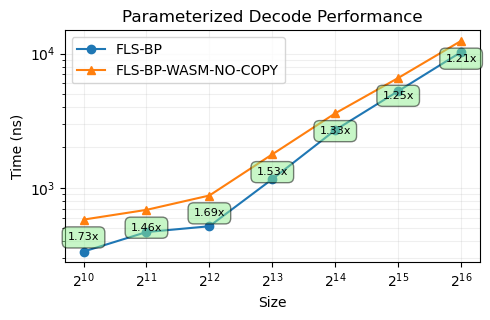

In [13]:
import json
import csv

# Input and output file paths
name = "output_reuse_input"
parse_jsonl_to_csv(name)
# Read the CSV file
csv_file_path = f"{name}.csv"  # Replace with your output file path
data = pd.read_csv(csv_file_path)
data['Size'] = pd.to_numeric(data['Size'])

# Separate data into wasm and native
wasm_data = data[data['Type'] == 'wasm']
native_data = data[data['Type'] == 'native']

# Sort data by 'Size'
wasm_data = wasm_data.sort_values('Size')
native_data = native_data.sort_values('Size')

plot(wasm_data['Size'], native_data['Time'], None, wasm_data['Time'])

CSV file created successfully.


/tmp/ipykernel_1348710/903397887.py:31: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


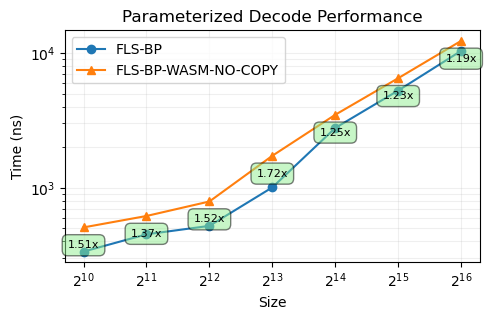

In [9]:
import json
import csv

# Input and output file paths
name = "output_reuse+batch"
parse_jsonl_to_csv(name)
# Read the CSV file
csv_file_path = f"{name}.csv"  # Replace with your output file path
data = pd.read_csv(csv_file_path)
data['Size'] = pd.to_numeric(data['Size'])

# Separate data into wasm and native
wasm_data = data[data['Type'] == 'wasm']
native_data = data[data['Type'] == 'native']

# Sort data by 'Size'
wasm_data = wasm_data.sort_values('Size')
native_data = native_data.sort_values('Size')

plot(wasm_data['Size'], native_data['Time'], None, wasm_data['Time'])